# In this notebook I am going to validate the results of Gaztañaga and Fosalba

In [4]:
# Importing libraries
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline
# Import the NaMaster python wrapper
import pymaster as nmt
import getdist
from getdist import plots, MCSamples
import corner
import iminuit

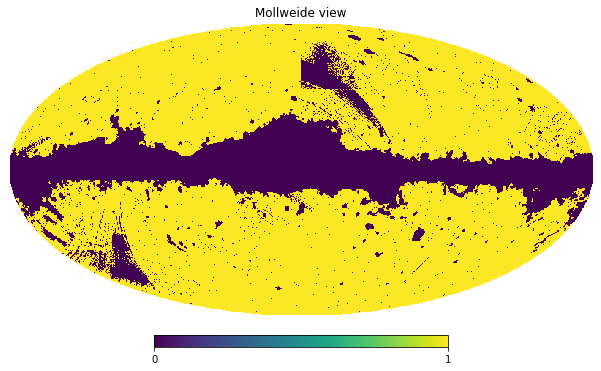

In [5]:
# Reading the map and masks
planck_map = hp.read_map('/home/akozameh/cmblss/data/COM_CMB_IQU-smica_2048_R3.00_oe2.fits')
m_1 = hp.read_map('/home/akozameh/cmblss/data/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')
m_2 = hp.read_map('/home/akozameh/cmblss/data/COM_Mask_CMB-HM-Misspix-Mask-Int_2048_R3.00.fits')

# Convert masks to numpy arrays with boolean dtype
m_1 = np.array(m_1, dtype=bool)
m_2 = np.array(m_2, dtype=bool)

# Combine masks using AND (common mask + Odd-Even missing pixels)
combined_mask = m_1 & m_2

# Visualize the mask
hp.mollview(combined_mask)

In [6]:
hp.write_map("combined_mask.fits", combined_mask, overwrite=True)

setting the output map dtype to [dtype('bool')]


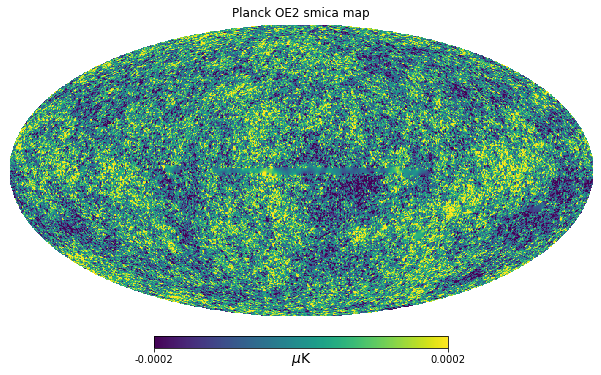

In [7]:
hp.mollview(planck_map, min=-200e-6, max=200e-6, title='Planck OE2 smica map', unit ='$\mu$K')     

In [8]:
# Masked map
#mask=hp.read_map('/home/akozameh/cmblss/data/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')
mask_1=hp.read_map('/home/akozameh/cmblss/code/cmblss-main/combined_mask.fits')
smica_masked=hp.ma(planck_map)
smica_masked.mask=np.logical_not(mask_1)

In [9]:
# Smoothin the map
smica_masked=hp.smoothing(smica_masked, fwhm=(np.radians(1.0)))

In [193]:
nside=2048
mask_1=hp.ud_grade(mask_1,nside)
planck_map=hp.ud_grade(planck_map, nside)

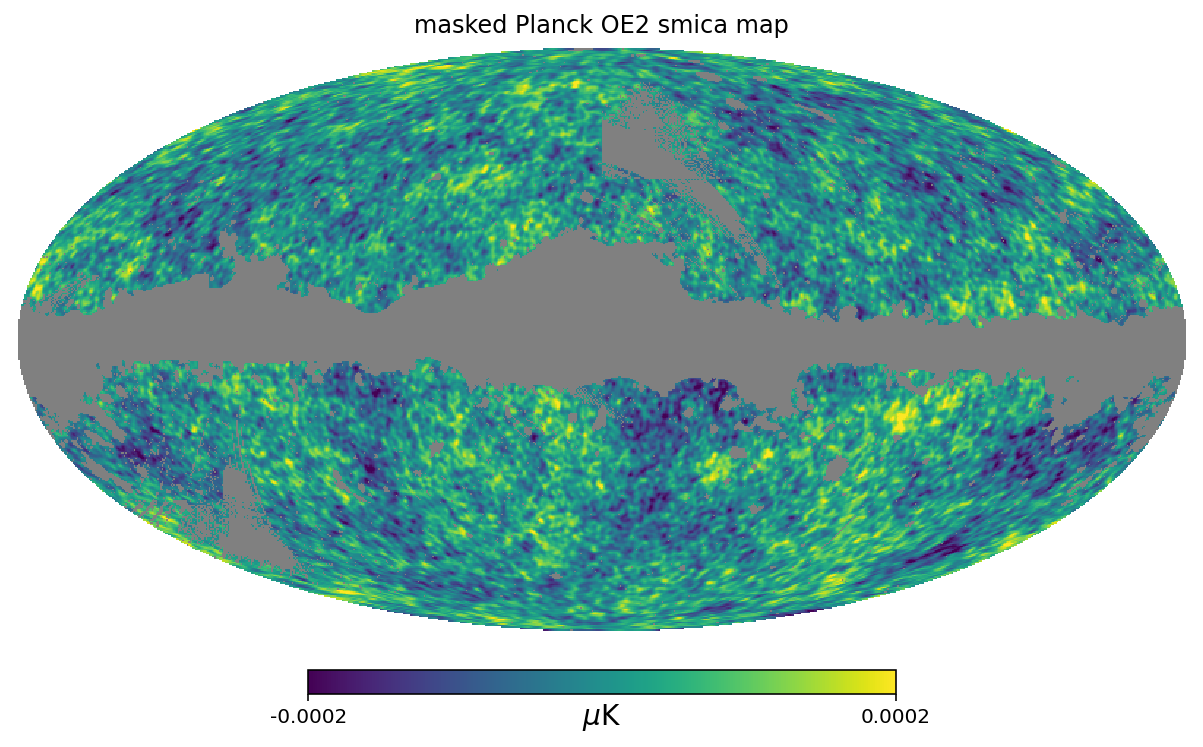

In [194]:
hp.mollview(smica_masked,min=-200e-6, max=200e-6, title='masked Planck OE2 smica map', unit ='$\mu$K')


In [195]:
# i set the horizon size for our analysis
longitude_1=345 # In degrees
latitude_1=15 # In degrees

longitude_1_rad=np.radians(longitude_1)
latitude_1_rad=np.radians(latitude_1)
colalitude_rad=np.pi/2 - latitude_1_rad

# i am going to set the horizons for our analysis"

vec_1=hp.ang2vec(colalitude_rad, longitude_1_rad)

# We set of the disc at 60 degrees to perform our analysis
radius=np.radians(60.)
disc_1=hp.query_disc(nside,vec_1,radius)

In [196]:
# Create a disc mask with zeros outside the disc
disc_mask_1 = np.zeros(hp.nside2npix(nside), dtype=bool)
disc_mask_1[disc_1] = True

In [197]:
# Combine the disc masks with the final mask
f_mask=disc_mask_1 & mask_1

In [198]:
# Save the final mask
hp.write_map("f_mask.fits", f_mask, overwrite=True)


setting the output map dtype to [dtype('bool')]


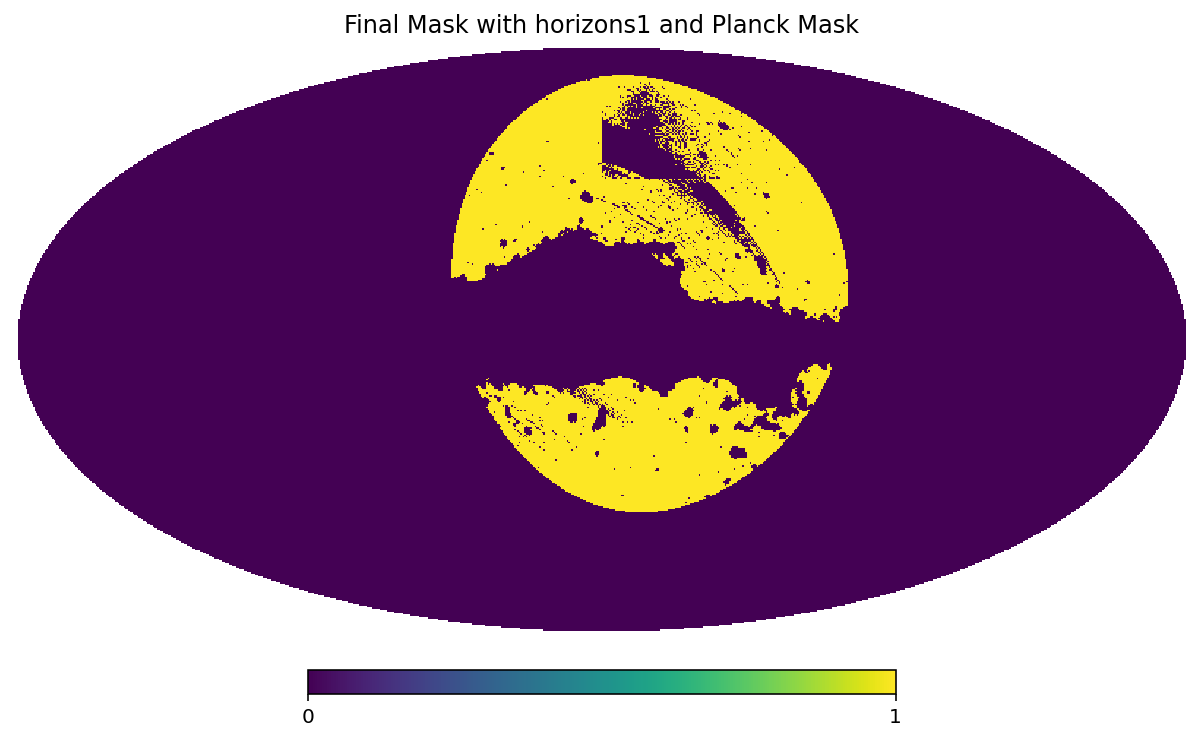

In [199]:
# Visualize the final mask
hp.mollview(f_mask, title="Final Mask with horizons1 and Planck Mask")
plt.show()

$f_{sky}$ is the effective are of the CMB sky for our analysis

In [200]:
# Calculate f_sky
f_sky = np.sum(f_mask) / len(f_mask)

print(f'f_sky = {f_sky}')

f_sky = 0.14718530575434366


In [201]:
# Set the disc 2
longitude_2=240 # In degrees
latitude_2=-5 # In degrees

longitude_2_rad=np.radians(longitude_2)
latitude_2_rad=np.radians(latitude_2)
colalitude_2_rad=np.pi/2 - latitude_2_rad

# i am going to set the horizons for our analysis"

vec_2=hp.ang2vec(colalitude_2_rad, longitude_2_rad)

# We set of the disc at 60 degrees to perform our analysis
radius=np.radians(60.)
disc_2=hp.query_disc(nside,vec_2,radius)

In [202]:
# Create a disc mask with zeros outside the disc
disc_mask_2 = np.zeros(hp.nside2npix(nside), dtype=bool)
disc_mask_2[disc_2] = True

In [203]:
# Combine the disc masks with the final mask
f_mask_2=disc_mask_2 & mask_1

In [204]:
# Save the final mask
hp.write_map("f_mask_2.fits", f_mask_2, overwrite=True)


setting the output map dtype to [dtype('bool')]


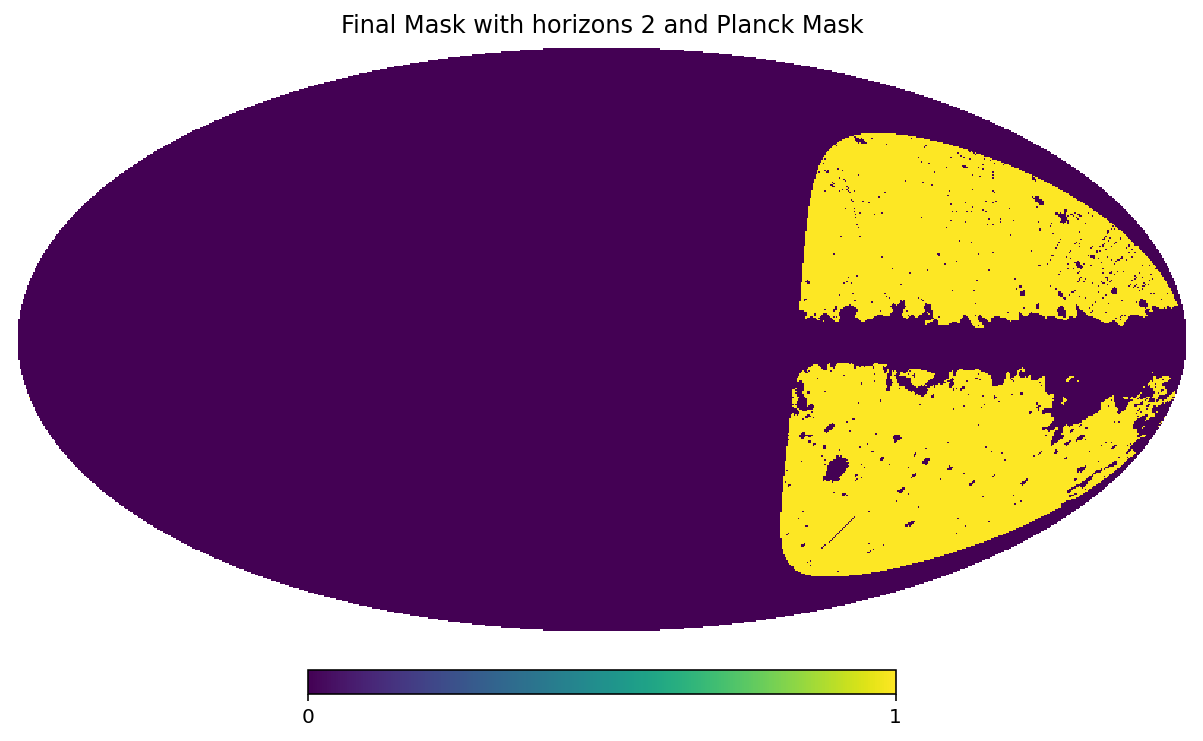

In [205]:
# Visualize the final mask
hp.mollview(f_mask_2, title="Final Mask with horizons 2 and Planck Mask")
plt.show()

In [206]:
longitude_3=150 # In degrees
latitude_3=-40 # In degrees

longitude_3_rad=np.radians(longitude_3)
latitude_3_rad=np.radians(latitude_3)
colalitude_rad_3=np.pi/2 - latitude_3_rad

# i am going to set the horizons for our analysis"

vec_3=hp.ang2vec(colalitude_rad, longitude_3_rad)

# We set of the disc at 60 degrees to perform our analysis
radius=np.radians(60.)
disc_3=hp.query_disc(nside,vec_3,radius)

In [207]:
# Create a disc mask with zeros outside the disc
disc_mask_3 = np.zeros(hp.nside2npix(nside), dtype=bool)
disc_mask_3[disc_3] = True

In [208]:
# Combine the disc masks with the final mask
f_mask_3=disc_mask_3 & mask_1

In [209]:
# Save the final mask
hp.write_map("f_mask_3.fits", f_mask_3, overwrite=True)


setting the output map dtype to [dtype('bool')]


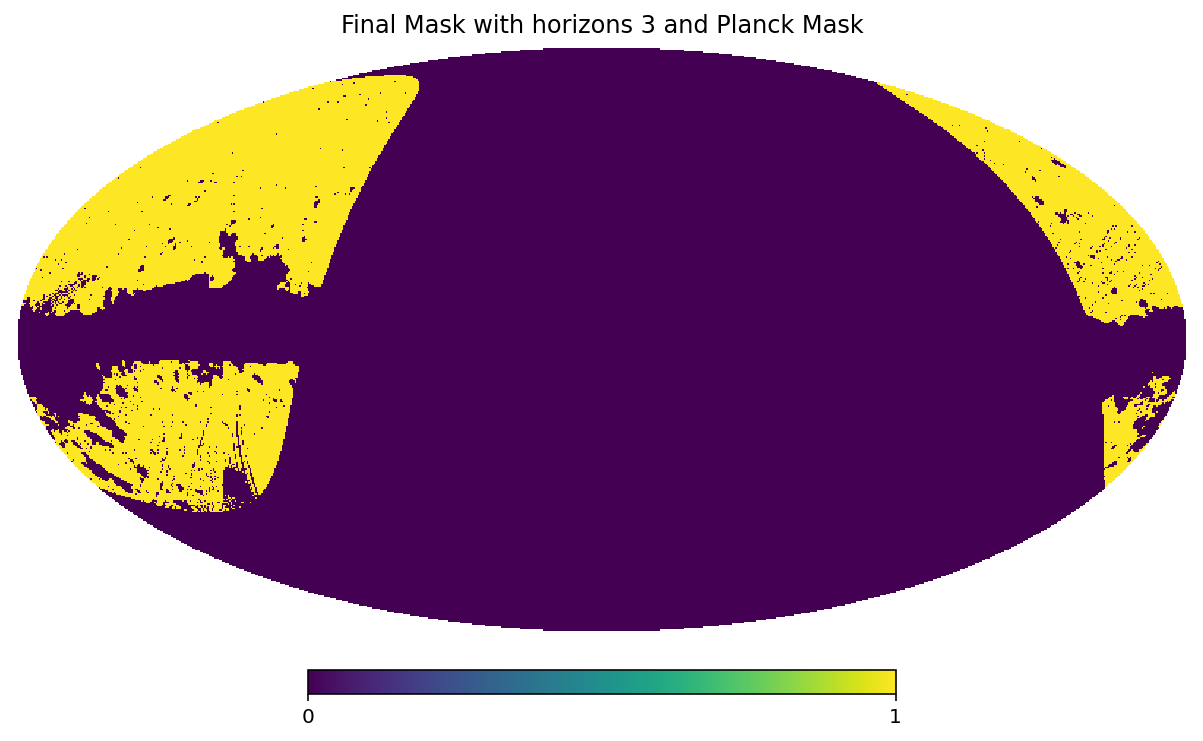

In [210]:
# Visualize the final mask
hp.mollview(f_mask_3, title="Final Mask with horizons 3 and Planck Mask")
plt.show()

In [211]:
# I compute the pseudo cls with namaster
# Apply the mask to the CMB map
masked_planck_map_1 = hp.ma(planck_map)
masked_planck_map_1.mask = np.logical_not(f_mask)

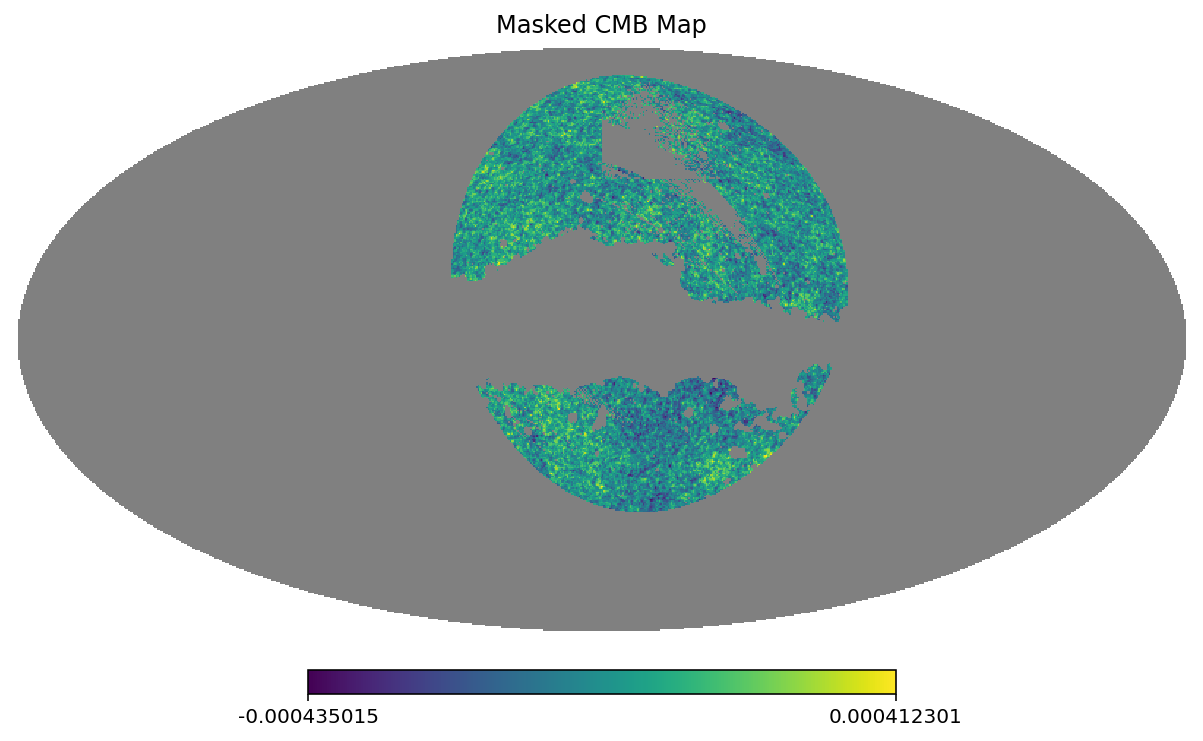

In [212]:
# Visualize the masked CMB map
hp.mollview(masked_planck_map_1, title="Masked CMB Map")
plt.show()

In [213]:
# Compute Cls using NaMaster
f_0 = nmt.NmtField(f_mask, [masked_planck_map_1])
# Initialize binning scheme with 4 ells per bandpower
b = nmt.NmtBin.from_nside_linear(nside, 4)

In [214]:
# Compute MASTER estimator
# spin-0 x spin-0
cl_00 = nmt.compute_full_master(f_0, f_0, b)

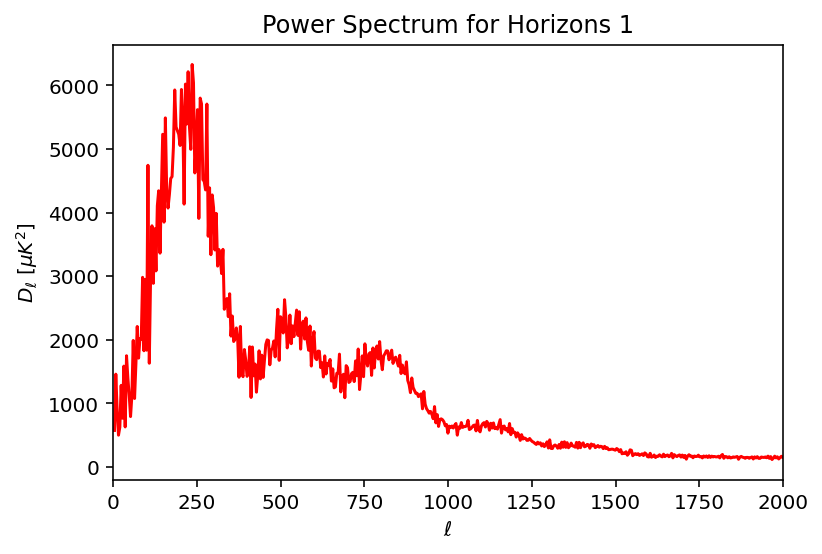

In [215]:
# Plot results

el = b.get_effective_ells()
Dl = cl_00[0]*el*(el+1)*[(1e6)**(2)]/2/np.pi
plt.plot(el,Dl, 'r-', label='TT for horizons 1 ')
plt.xlabel('$\ell$')
plt.xlim(0,2000)
plt.ylabel(r'$D_\ell~[\mu K^2]$')
plt.title('Power Spectrum for Horizons 1')
plt.show()

In [216]:
Dl.shape

(1535,)

Reading the documentation of the Planck smica release we see that the output has a resolution of 10 minutes.Therefore as a first order correction of the beam, then we can divide the power spectrum by the gauss beam window function. I compute the spherical transform of a aximmetric gaussian beam with hp.gauss_beam

In [217]:
# Assuming you have already computed the power spectrum using NaMaster
# f_0 = nmt.NmtField(f_mask, [masked_planck_map_1])
# b = nmt.NmtBin.from_nside_linear(nside, 4)
# cl_00 = nmt.compute_full_master(f_0, f_0, b)
# el = b.get_effective_ells()
# Dl = cl_00[0] * el * (el + 1) * (1e6)**2 / (2 * np.pi)

# Define the FWHM for the Planck SMICA beam (10 arcminutes)
fwhm_arcmin = 10
fwhm_rad = np.radians(fwhm_arcmin / 60.0)  # Convert to radians

# Compute the Gaussian beam window function using healpy
beam_window = hp.gauss_beam(fwhm_rad, lmax=np.max(el))

# Apply the correction: Divide the power spectrum by the beam window function squared
Dl_corrected = Dl / beam_window[:len(el)]**2

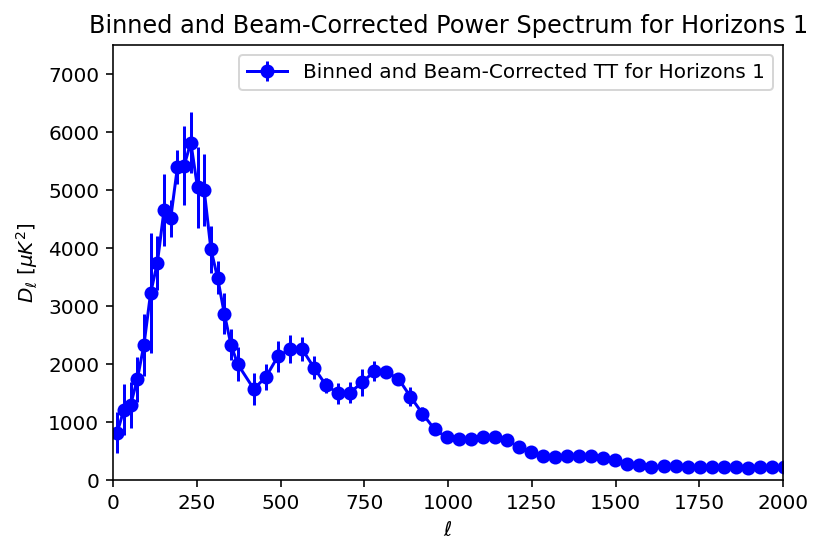

In [219]:


# Assuming you have already computed the power spectrum using NaMaster
# f_0 = nmt.NmtField(f_mask, [masked_planck_map_1])
# b = nmt.NmtBin.from_nside_linear(nside, 4)
# cl_00 = nmt.compute_full_master(f_0, f_0, b)
# el = b.get_effective_ells()
# Dl = cl_00[0] * el * (el + 1) * (1e6)**2 / (2 * np.pi)

# Define the FWHM for the Planck SMICA beam (10 arcminutes)
fwhm_arcmin = 10
fwhm_rad = np.radians(fwhm_arcmin / 60.0)  # Convert to radians

# Compute the Gaussian beam window function using healpy
beam_window = hp.gauss_beam(fwhm_rad, lmax=np.max(el))

# Apply the correction: Divide the power spectrum by the beam window function squared
Dl_corrected = Dl / beam_window[:len(el)]**2

# Now we bin the corrected power spectrum using the same binning strategy as before
def binsdata(ell, Dl_corrected, sums):
    bins = int(len(ell) / sums)
    
    cln = np.zeros(bins)
    ln = np.zeros(bins)
    lndis = np.zeros(bins)
    clndis = np.zeros(bins)
    
    for i in range(bins):
        ln[i] = np.mean(ell[sums * i:sums * (i + 1)])  # Mean of binned ell
        cln[i] = np.mean(Dl_corrected[sums * i:sums * (i + 1)])  # Mean of binned Dl
        lndis[i] = np.std(ell[sums * i:sums * (i + 1)])  # Std dev of binned ell
        clndis[i] = np.std(Dl_corrected[sums * i:sums * (i + 1)])  # Std dev of binned Dl
    
    return ln, cln, lndis, clndis

# Example binning: you can adjust sums based on your needs
ln1, cln1, lndis1, clndis1 = binsdata(el[0:99], Dl_corrected[0:99], 5)
ln2, cln2, lndis2, clndis2 = binsdata(el[100:1500], Dl_corrected[100:1500], 9)
ln3, cln3, lndis3, clndis3 = binsdata(el[1501:2013], Dl_corrected[1501:2013], 17)
ln4, cln4, lndis4, clndis4 = binsdata(el[2014:2500], Dl_corrected[2014:2500], 33)

# Concatenate the results
Lntotal = np.concatenate([ln1, ln2, ln3, ln4])
Clntotal = np.concatenate([cln1, cln2, cln3, cln4])
Lntotaldisp = np.concatenate([lndis1, lndis2, lndis3, lndis4])
Clntotaldisp = np.concatenate([clndis1, clndis2, clndis3, clndis4])

# Plot the binned, beam-corrected power spectrum
plt.errorbar(Lntotal, Clntotal, xerr=Lntotaldisp, yerr=Clntotaldisp, fmt='bo-', label='Binned and Beam-Corrected TT for Horizons 1')
plt.xlabel(r'$\ell$')
plt.xlim(0, 2000)
plt.ylim(0,7500)
plt.ylabel(r'$D_\ell~[\mu K^2]$')
plt.title('Binned and Beam-Corrected Power Spectrum for Horizons 1')
plt.legend()
plt.show()


## In this part I am going to do the parameters exploration using iminuit

In [220]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os

import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# make sure the version and path is what you expect

Using CAMB 1.5.7 installed at /home/akozameh/miniconda3/envs/CMB/lib/python3.10/site-packages/camb


In [221]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

In [222]:
# Hypothetical function to compute the theoretical power spectrum
def theoretical_Cls(H0, ombh2, omch2, mnu, omk, tau, As, ns, lmax):
    # Set up a new set of parameters for CAMB
    pars = camb.set_params(H0=H0, ombh2=ombh2, omch2=omch2, mnu=mnu, omk=omk, tau=tau,  
                           As=As, ns=ns, lmax=lmax)
    
    # Calculate results for these parameters
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    totCL = powers['total']  # Get the total power spectrum (including lensed scalar)

    # Extract the theoretical power spectrum (Dl_th)
    Dl_th = totCL[:, 0]  # TT spectrum is the first column

    # Get the corresponding ell values
    ells = np.arange(0, lmax + 1)
    
    return ells, Dl_th

# Define cosmological parameters and lmax
lmax = 2000
H0 = 67.5
ombh2 = 0.022
omch2 = 0.122
mnu = 0.06
omk = 0.0
tau = 0.06
As = 2e-9
ns = 0.965

# Compute the theoretical power spectrum
ells, Dl_th = theoretical_Cls(H0, ombh2, omch2, mnu, omk, tau, As, ns, lmax)

In [223]:
l.shape

(2051,)

I am going to plot the experimental and theoretical power spectrum

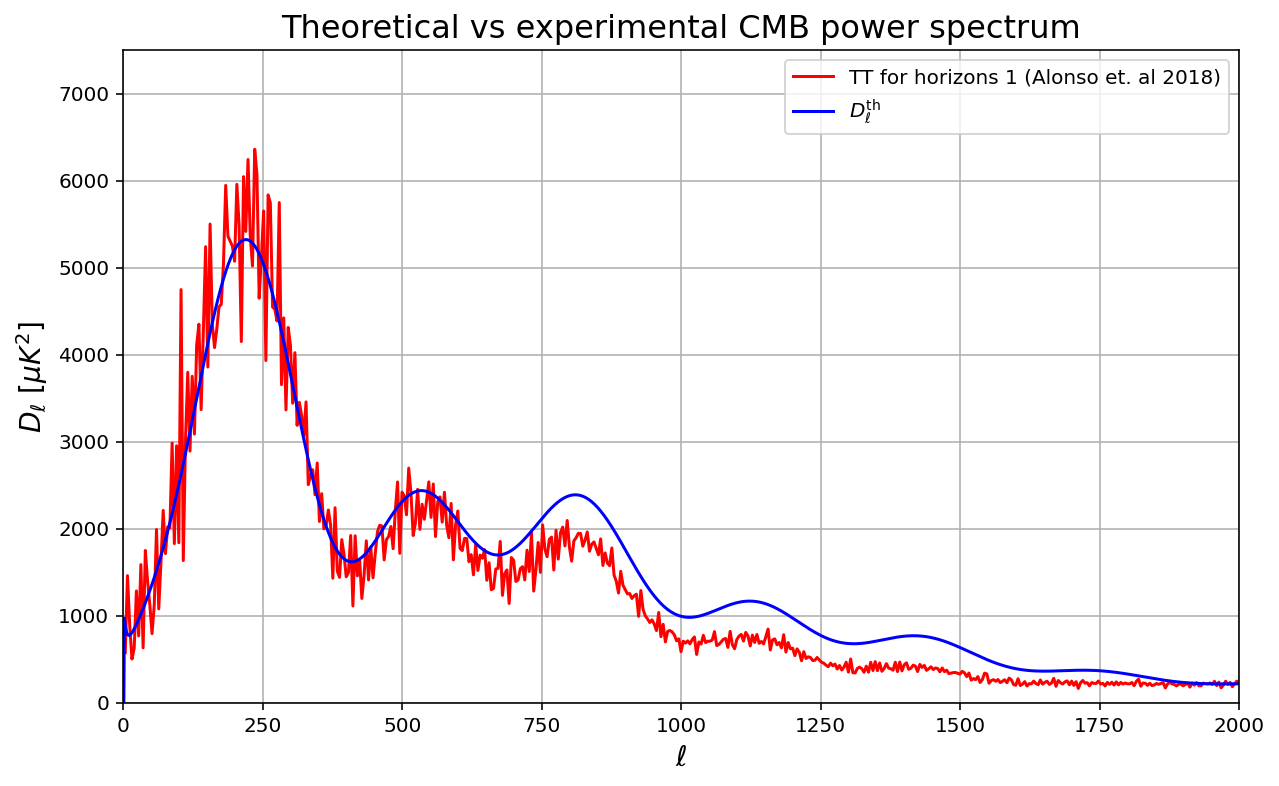

In [225]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(el,Dl_corrected, 'r-', label='TT for horizons 1 (Alonso et. al 2018)')
plt.xlabel('$\ell$')
plt.xlim(0,2000)
plt.ylim(0,7500)
plt.ylabel(r'$D_\ell~[\mu K^2]$')
plt.plot(l, Dl_th, label=r'$D_\ell^{\mathrm{th}}$', color='blue')
plt.xlabel(r'$\ell$', fontsize=14)
plt.ylabel(r'$D_\ell~[\mu K^2]$', fontsize=14)
plt.title('Theoretical vs experimental CMB power spectrum', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

In [226]:
# Generate 2051 evenly spaced values between 4 and 3067
l_values = np.linspace(4, 3067, 2051)

# Print the generated values to check
l_values.shape

(2051,)

In [300]:
el.shape

(1535,)

#### In this section I am going to interpolate my pseudo cls and pseudo els for explorating
#### cosmological parameters.

In [227]:
from scipy.interpolate import interp1d
f=interp1d(el, Dl_corrected, kind='nearest') # My function to interpolation 

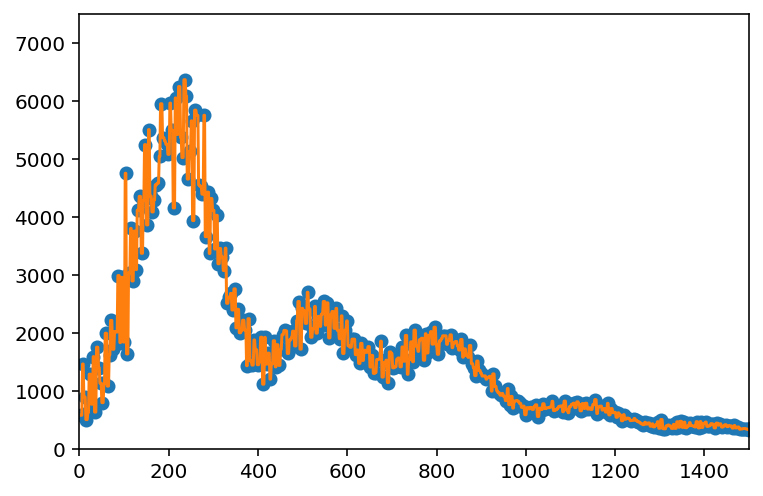

In [229]:
l_new=np.linspace(4, 3067, 2051) # Adjust as needed
estimated_Dl=f(l_new)
plt.plot(el, Dl_corrected, 'o', l_new, estimated_Dl, '-')
plt.xlim(0,1500)
plt.ylim(0,7500)
plt.show()

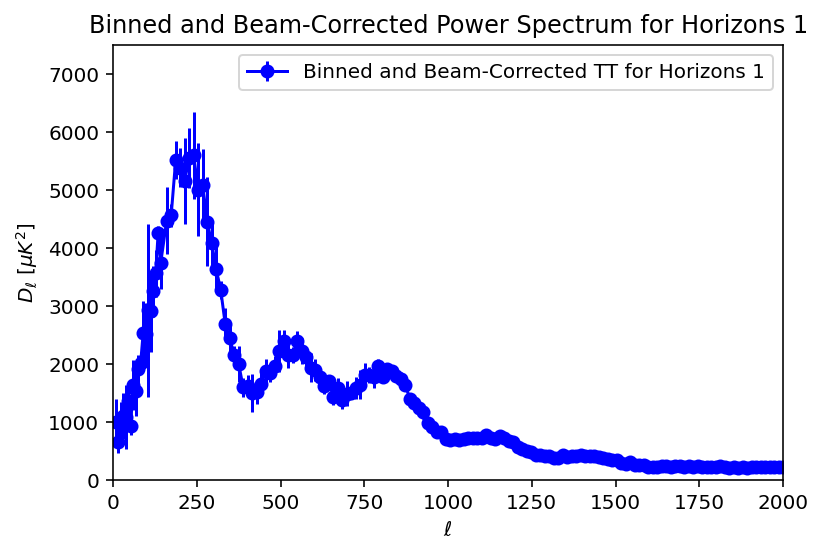

In [281]:
# Now we bin the corrected power spectrum using the same binning strategy as before
def binsdata(l_new, estimated_Dl, sums):
    bins = int(len(l_new) / sums)
    
    cln = np.zeros(bins)
    ln = np.zeros(bins)
    lndis = np.zeros(bins)
    clndis = np.zeros(bins)
    
    for i in range(bins):
        ln[i] = np.mean(l_new[sums * i:sums * (i + 1)])  # Mean of binned ell
        cln[i] = np.mean(estimated_Dl[sums * i:sums * (i + 1)])  # Mean of binned Dl
        lndis[i] = np.std(l_new[sums * i:sums * (i + 1)])  # Std dev of binned ell
        clndis[i] = np.std(estimated_Dl[sums * i:sums * (i + 1)])  # Std dev of binned Dl
    
    return ln, cln, lndis, clndis

# Example binning: you can adjust sums based on your needs
ln1, cln1, lndis1, clndis1 = binsdata(l_new[0:99], estimated_Dl[0:99], 5)
ln2, cln2, lndis2, clndis2 = binsdata(l_new[100:1500], estimated_Dl[100:1500], 9)
ln3, cln3, lndis3, clndis3 = binsdata(l_new[1501:2013], estimated_Dl[1501:2013], 17)
ln4, cln4, lndis4, clndis4 = binsdata(l_new[2014:2500], estimated_Dl[2014:2500], 33)

# Concatenate the results
Lntotal = np.concatenate([ln1, ln2, ln3, ln4])
Clntotal = np.concatenate([cln1, cln2, cln3, cln4])
Lntotaldisp = np.concatenate([lndis1, lndis2, lndis3, lndis4])
Clntotaldisp = np.concatenate([clndis1, clndis2, clndis3, clndis4])

# Plot the binned, beam-corrected power spectrum
plt.errorbar(Lntotal, Clntotal, xerr=Lntotaldisp, yerr=Clntotaldisp, fmt='bo-', label='Binned and Beam-Corrected TT for Horizons 1')
plt.xlabel(r'$\ell$')
plt.xlim(0, 2000)
plt.ylim(0,7500)
plt.ylabel(r'$D_\ell~[\mu K^2]$')
plt.title('Binned and Beam-Corrected Power Spectrum for Horizons 1')
plt.legend()
plt.show()

In [231]:
from IPython.display import display, Math
display(Math(r'\sigma(C_{\ell})= \sqrt{\frac{2}{(2l+1)f_{sky}}} \cdot C_{\ell}'))

<IPython.core.display.Math object>

In this subsection, I am going to compute the errors of pseudo \(C_\ell\). To compute the errors for the pseudo-power spectrum, you can estimate them using a simple approximation. One of the most straightforward methods is to assume that the errors are dominated by cosmic variance and noise, which gives:

$$\sigma(C_{\ell})= \sqrt{\frac{2}{(2l+1)f_{sky}} \cdot C_{\ell}}$$

Where $C_{\ell}$ are my pseudo power spectrum,
$f_{sky}=1$ is fraction of our sky for analysis.

In [232]:
Dl_err = np.sqrt(2 / ((2*l + 1)*f_sky))*estimated_Dl

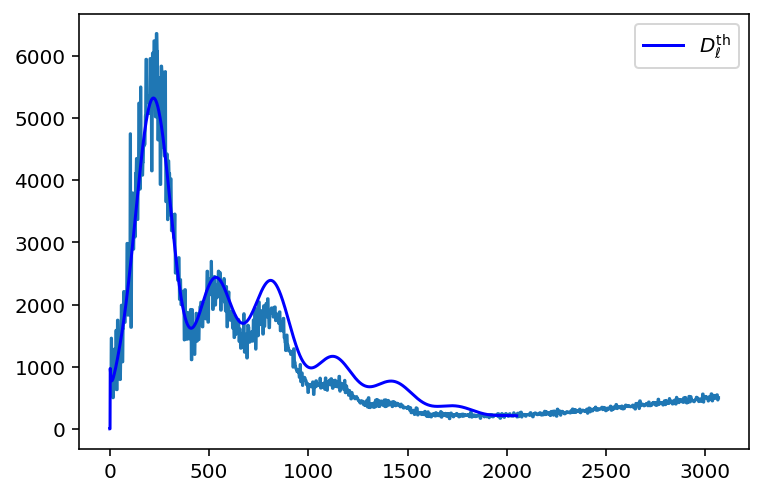

In [236]:
plt.plot(l_new, estimated_Dl)
plt.plot(l, Dl_th, label=r'$D_\ell^{\mathrm{th}}$', color='blue')
plt.legend()


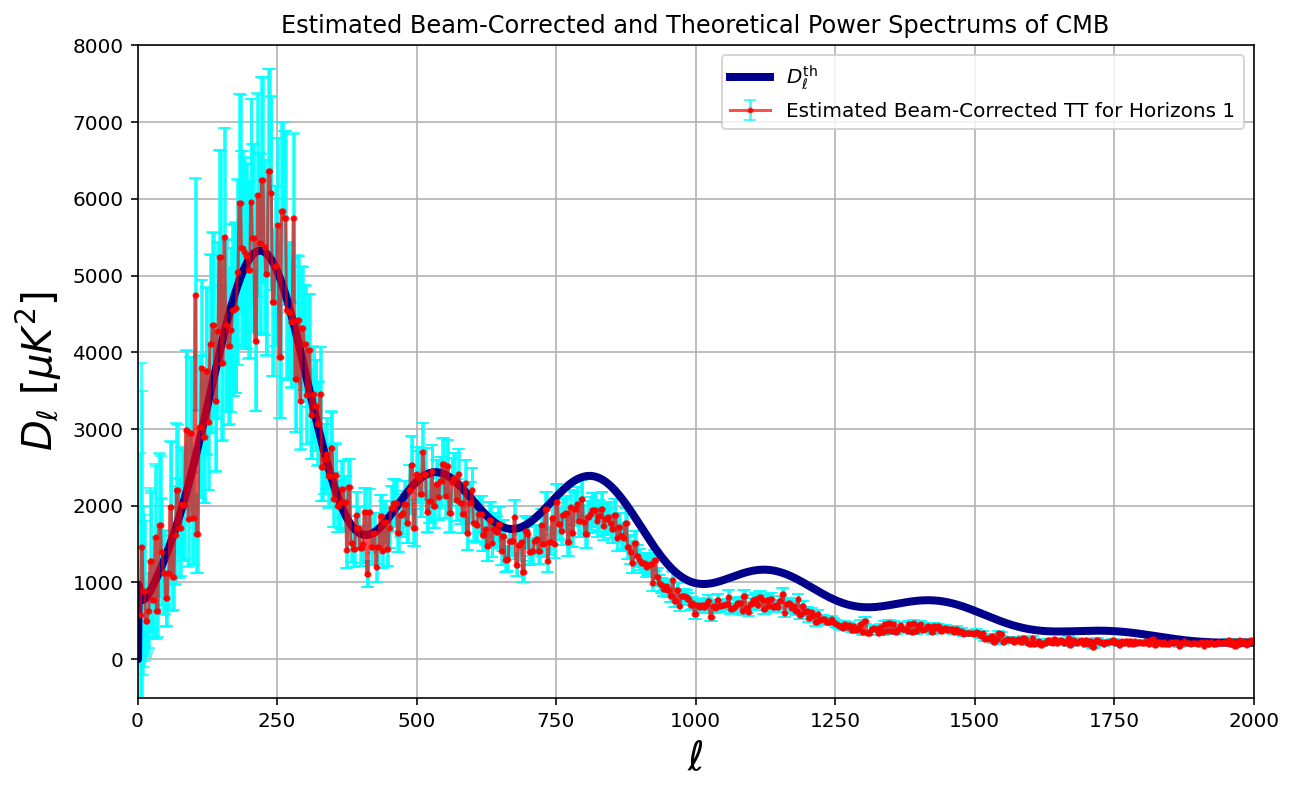

In [241]:

plt.figure(figsize=(10, 6))
plt.errorbar(
    l_new, estimated_Dl, 
    yerr=Dl_err, 
    fmt='ro-',           # Change color to red and use small circles for points
    ecolor='cyan',          # Error bars will be red
    capsize=3,           # Set the size of the caps on the error bars
    alpha=0.7,           # Set transparency to 70%
    markersize=2,        # Decrease the size of the markers
    label='Estimated Beam-Corrected TT for Horizons 1'
)
plt.plot(
    l, Dl_th, 
    linewidth=4,
    label=r'$D_\ell^{\mathrm{th}}$', 
    color='darkblue'
)

plt.xlabel(r'$\ell$', fontsize=20)
plt.xlim(0, 2000)
plt.ylim(-500, 8000)  # Adjust the y-axis as needed

plt.ylabel(r'$D_\ell~[\mu K^2]$', fontsize=20)
plt.grid(True)
plt.legend()
plt.title('Estimated Beam-Corrected and Theoretical Power Spectrums of CMB')

plt.show()



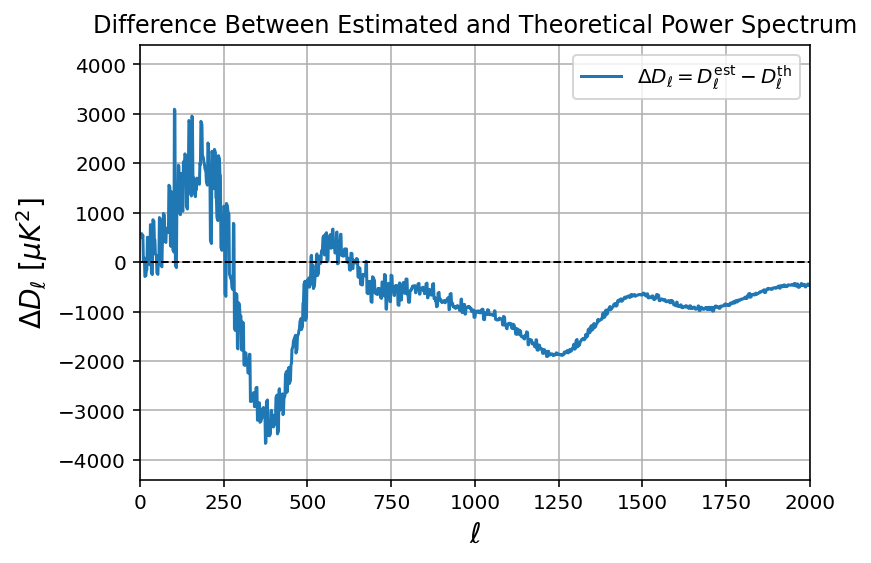

In [245]:
# Compute the differences between estimated and theoretical D_ell
Dl_diff = estimated_Dl - Dl_th[:len(estimated_Dl)]# Ensure both arrays have the same length
plt.plot(l_new, Dl_diff, label=r'$\Delta D_\ell = D_\ell^{\mathrm{est}} - D_\ell^{\mathrm{th}}$')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.xlabel(r'$\ell$', fontsize=14)
plt.xlim(0, 2000)
plt.ylabel(r'$\Delta D_\ell~[\mu K^2]$', fontsize=14)
plt.ylim(-max(abs(Dl_diff)) * 1.2, max(abs(Dl_diff)) * 1.2)  # Adjust y-limits for better visibility
plt.grid(True)
plt.legend()
plt.title('Difference Between Estimated and Theoretical Power Spectrum')

plt.show()


I am going to put together both power spectrum together with its residual differences with respect to l.

Text(0.5, 1.0, 'Residual differences between experimental and Theoretical Power Spectrums of CMB')

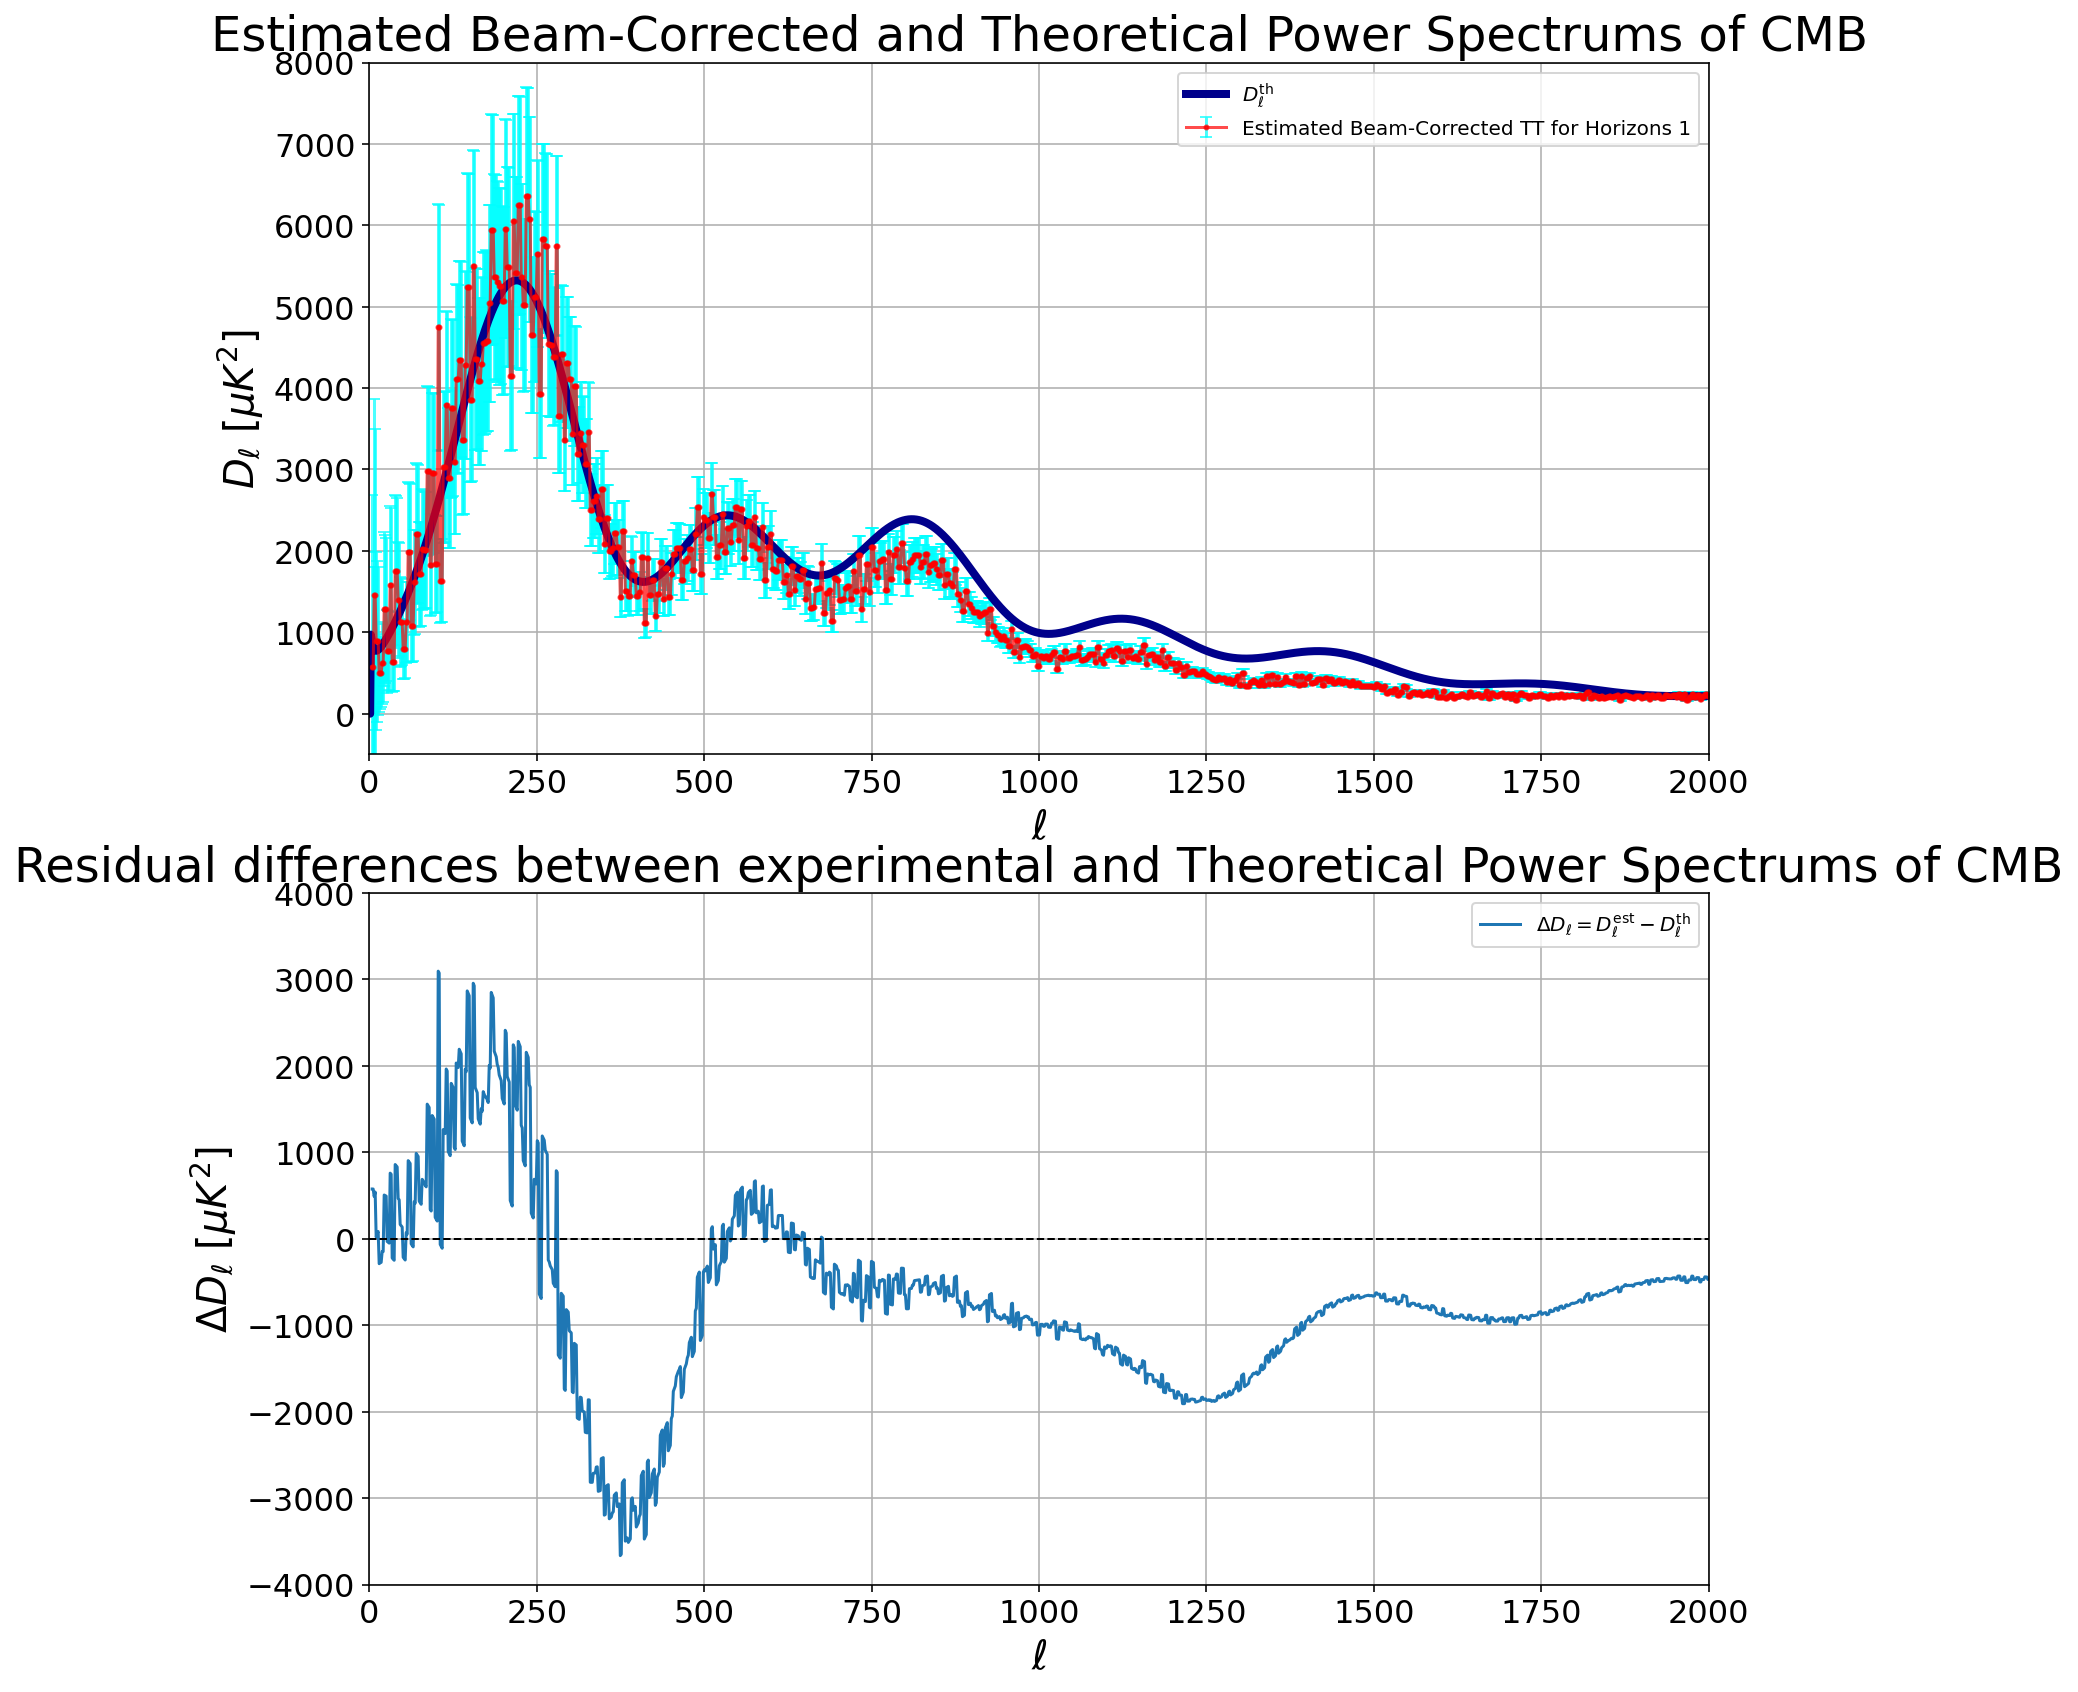

In [298]:
# Plotting together
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 14))

#fig.suptitle('Estimated Beam-Corrected and Theoretical Power Spectrums of CMB and its differences with respect to l', fontsize=12)
# Errobar plot
ax1.errorbar(l_new, estimated_Dl, 
    yerr=Dl_err, 
    fmt='ro-',           # Change color to red and use small circles for points
    ecolor='cyan',          # Error bars will be red
    capsize=3,           # Set the size of the caps on the error bars
    alpha=0.7,           # Set transparency to 70%
    markersize=2,        # Decrease the size of the markers
    label='Estimated Beam-Corrected TT for Horizons 1')
# Theorethical plot
ax1.plot(l, Dl_th, 
    linewidth=4,
    label=r'$D_\ell^{\mathrm{th}}$', 
    color='darkblue'
)
ax1.set_xlabel(r'$\ell$', fontsize=20)
ax1.set_xlim(0, 2000)
ax1.set_ylim(-500, 8000)  # Adjust the y-axis as needed
ax1.tick_params(axis='both', which='major', labelsize=16)

ax1.set_ylabel(r'$D_\ell~[\mu K^2]$', fontsize=20)
ax1.grid(True)
ax1.legend()
ax1.set_title('Estimated Beam-Corrected and Theoretical Power Spectrums of CMB', fontsize=24)

# Residual differences plot
             
ax2.plot(l_new, Dl_diff, label=r'$\Delta D_\ell = D_\ell^{\mathrm{est}} - D_\ell^{\mathrm{th}}$')
ax2.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
ax2.set_xlabel(r'$\ell$', fontsize=20)
ax2.set_ylabel(r'$\Delta D_\ell~[\mu K^2]$', fontsize=20)
ax2.set_xlim(0, 2000)
ax2.set_ylim(-4000, 4000)  # Adjust the y-axis as needed
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.grid(True)
ax2.legend()
ax2.set_title('Residual differences between experimental and Theoretical Power Spectrums of CMB', fontsize=24)

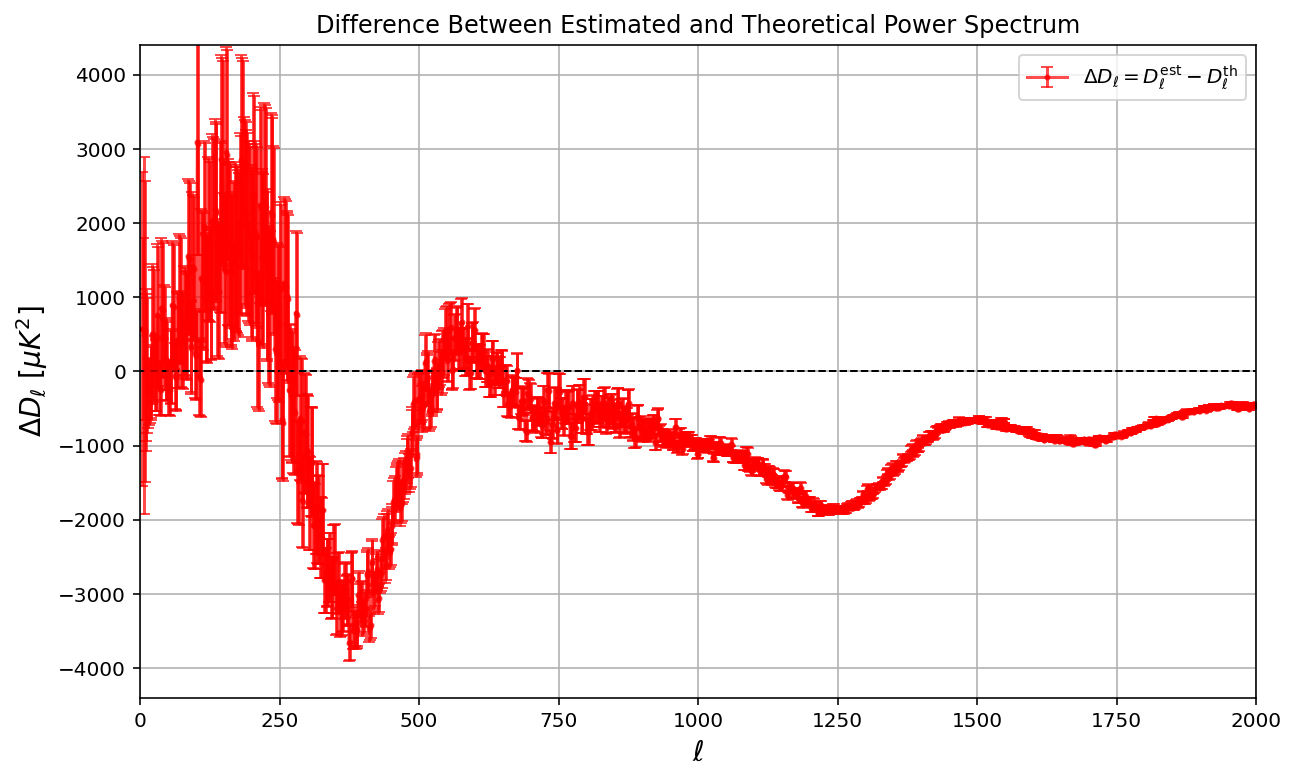

In [242]:
# Compute the differences between estimated and theoretical D_ell
Dl_diff = estimated_Dl - Dl_th[:len(estimated_Dl)]  # Ensure both arrays have the same length

# Plot the differences
plt.figure(figsize=(10, 6))
plt.errorbar(
    l_new, Dl_diff, 
    yerr=Dl_err, 
    fmt='ro-',        # Red markers for the differences
    ecolor='r',       # Red error bars
    capsize=3, 
    alpha=0.7, 
    markersize=2, 
    label=r'$\Delta D_\ell = D_\ell^{\mathrm{est}} - D_\ell^{\mathrm{th}}$'
)

plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0

plt.xlabel(r'$\ell$', fontsize=14)
plt.xlim(0, 2000)
plt.ylabel(r'$\Delta D_\ell~[\mu K^2]$', fontsize=14)
plt.ylim(-max(abs(Dl_diff)) * 1.2, max(abs(Dl_diff)) * 1.2)  # Adjust y-limits for better visibility
plt.grid(True)
plt.legend()
plt.title('Difference Between Estimated and Theoretical Power Spectrum')

plt.show()


In [287]:
# My observed data (binned, beam-corrected power spectrum and errors)
ell = l_new
Dl_obs = estimated_Dl
Dl_err = Dl_err

In [283]:
def theoretical_Cls(H0, ombh2, omch2, mnu, omk, tau, As, ns, lmax):
    # Ensure lmax is an integer
    lmax = int(lmax)
    
    # Set up a new set of parameters for CAMB
    pars = camb.set_params(H0=H0, ombh2=ombh2, omch2=omch2, mnu=mnu, omk=omk, tau=tau,  
                           As=As, ns=ns, lmax=lmax)
    # Imprints the values
    print(pars)
    # Calculate results for these parameters
    results = camb.get_results(pars)

    # Extract the CMB power spectra (TT) and return it
    Dl_model = results.get_cmb_power_spectra(pars, lmax=lmax)['total'][:, 0]
    return Dl_model


In [285]:
Dl_obs = Dl_obs[:len(Dl_model)]
Dl_err = Dl_err[:len(Dl_model)]

NameError: name 'Dl_model' is not defined

In [290]:

from iminuit import Minuit
from iminuit.util import make_func_code
from scipy.stats import chi2

# Example chi-square function (to be replaced with your actual calculation)
def chi2_func(H0, ombh2, omch2, ns, As, tau, omk, mnu, lmax):
    Dl_model = theoretical_Cls(H0=H0, ombh2=ombh2, omch2=omch2, ns=ns, As=As, tau=tau, omk=omk, mnu=mnu, lmax=lmax)
    return np.sum((Dl_obs - Dl_th)**2 / Dl_err **2) 

# Initial guesses for cosmological parameters
initial_guesses = {
    'H0': 66.9,
    'ombh2': 0.0221,
    'omch2': 0.120,
    'ns': 0.965,
    'As': 2.09e-9,
    'tau': 0.054,
    'omk': 0.0,
    'mnu': 0.06,
    'lmax': 2000,
}

# Set parameter limits
parameter_limits = {
    'H0': (66.9, 68),
    'ombh2': (0.0222, 0.0250),
    'omch2': (0.100, 0.200),
    'ns': (0.900, 1.000),
    'As': (1.0e-9, 4e-9)
}

# Create the Minuit object
minimizer = Minuit(chi2_func, **initial_guesses)
for param, limits in parameter_limits.items():
    minimizer.limits[param] = limits

# Run the minimization
minimizer.migrad()

# Print the best-fit parameters and their uncertainties
print("Best-fit parameters:")
for param in initial_guesses.keys():
    print(f"{param} = {minimizer.values[param]} ± {minimizer.errors[param]}")

# Extract the covariance matrix
cov_matrix = minimizer.covariance

# Plot the confidence ellipses for pairs of parameters (e.g., H0 vs. ombh2)
def plot_confidence_ellipse(cov_matrix, param1, param2, minimizer, ax=None, n_std=1.0, **kwargs):
    import matplotlib.transforms as transforms
    from matplotlib.patches import Ellipse

    if ax is None:
        ax = plt.gca()

    mean = [minimizer.values[param1], minimizer.values[param2]]
    cov = cov_matrix[(param1, param2)]

    pearson = cov / np.sqrt(cov_matrix[(param1, param1)] * cov_matrix[(param2, param2)])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor='none', **kwargs)

    scale_x = np.sqrt(cov_matrix[(param1, param1)]) * n_std
    scale_y = np.sqrt(cov_matrix[(param2, param2)]) * n_std

    transf = (transforms.Affine2D()
              .rotate_deg(45)
              .scale(scale_x, scale_y)
              .translate(mean[0], mean[1]))

    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)

# Example plot for H0 vs. ombh2
fig, ax = plt.subplots()
ax.errorbar(minimizer.values['H0'], minimizer.values['ombh2'],
            xerr=minimizer.errors['H0'], yerr=minimizer.errors['ombh2'],
            fmt='o', color='red', label='Best-fit')

plot_confidence_ellipse(cov_matrix, 'H0', 'ombh2', minimizer, ax=ax, edgecolor='blue', n_std=1)
plot_confidence_ellipse(cov_matrix, 'H0', 'ombh2', minimizer, ax=ax, edgecolor='green', n_std=2)

ax.set_xlabel('H0')
ax.set_ylabel('ombh2')
ax.set_title('Confidence Ellipses for H0 and ombh2')
plt.legend()
plt.grid()
plt.show()


CAMBError: Error in Fortran called from calc_transfer:
You need to normalize realistically to use lensing. See http://cosmocoffee.info/viewtopic.php?t=94

In [266]:
# Defining and applying  the chi-square function
def chi2(H0, ombh2, omch2, mnu,omk,tau, As,ns,  lmax):
    Dl_model = theoretical_Cls(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965,  lmax=2000)
    return np.sum(((Dl_obs - Dl_th)**2 / Dl_err**2))

In [267]:
# Set up the minimization using iminuit
# Initial guesses and limits for the cosmological parameters following Planck 2018 results
initial_guesses = {
    'H0': 66.9,
    'ombh2': 0.0221,
    'omch2': 0.121,
    'ns':0.963,
    'As':2.09e-9,
    'tau':0.6,
    'omk':0.0,
    'mnu':0.06,
    'lmax': 2000,
}



parameter_limits = {
    'H0': (50.0, 90.0),
    'ombh2': (0.0215, 0.0300),
    'omch2': (0.100, 0.200),
    'ns':(0.900, 1000),
    'As': (2.0e-9, 3.0e-9),
}

In [268]:
# Create the Minuit object
minimizer = Minuit(chi2, **initial_guesses)

In [269]:
# Apply limits to the parameters if necessary
for param, limits in parameter_limits.items():
    minimizer.limits[param] = limits

In [270]:

# Run the minimization
minimizer.migrad()

# Print the best-fit parameters and their uncertainties
print("Best-fit parameters:")
for param in initial_guesses.keys():
    print(f"{param} = {minimizer.values[param]} ± {minimizer.errors[param]}")


Best-fit parameters:
H0 = 66.9 ± 0.0
ombh2 = 0.0221 ± 0.0
omch2 = 0.121 ± 0.0
ns = 0.9629999999999995 ± 0.0
As = 2.09e-09 ± 0.0
tau = 0.6 ± 0.0
omk = 0.0 ± 0.0
mnu = 0.06 ± 0.0
lmax = 2000.0 ± 0.0


In [253]:


# You can also visualize the fit
best_fit_spectrum = theoretical_Cls(ell_data, **minimizer.values)

plt.errorbar(ell_data, Dl_obs, yerr=Dl_err, fmt='o', label='Observed')
plt.plot(ell_data, best_fit_spectrum, label='Best-fit model')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell~[\mu K^2]$')
plt.title('Power Spectrum Fit')
plt.legend()
plt.show()


TypeError: __main__.theoretical_Cls() argument after ** must be a mapping, not ValueView

In [29]:
# I compute the pseudo cls with namaster
# Apply the mask to the CMB map
masked_planck_map_2 = hp.ma(planck_map)
masked_planck_map_2.mask = np.logical_not(f_mask_2)

In [30]:
# Compute Cls using NaMaster
f_2 = nmt.NmtField(f_mask_2, [masked_planck_map_2])
# Initialize binning scheme with 4 ells per bandpower
b_2 = nmt.NmtBin.from_nside_linear(nside, 4)

In [31]:
# Compute MASTER estimator
# spin-0 x spin-0
cl_00_2 = nmt.compute_full_master(f_2, f_2, b_2)

In [32]:
# Plot results
el_2 = b_2.get_effective_ells()
plt.plot(el_2, cl_00[0]*el_2*(el_2+1)*[(1e6)**(2)]/2/np.pi, 'r-', label='TT for horizons 2 ')
plt.xlabel('$\ell$')
plt.xlim(0,2000)
plt.ylabel(r'$D_\ell~[\mu K^2]$')
plt.title('Power Spectrum for Horizons 2')
plt.show()